In [3]:
import numpy as np
x = np.random.rand(4,4)
y = np.array([1,2,3,4])
x

array([[0.76170506, 0.35408183, 0.70424881, 0.50968636],
       [0.47687075, 0.21365859, 0.67338842, 0.00321477],
       [0.33311161, 0.73169743, 0.11285468, 0.83792426],
       [0.40290181, 0.40088537, 0.45271694, 0.75897607]])

In [4]:
x*y

array([[0.76170506, 0.70816366, 2.11274643, 2.03874544],
       [0.47687075, 0.42731718, 2.02016525, 0.01285907],
       [0.33311161, 1.46339486, 0.33856404, 3.35169703],
       [0.40290181, 0.80177073, 1.35815081, 3.03590429]])

In [236]:
# establish plane
import numpy as np
import graphtools
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2
X = np.mgrid[0:4:0.05, 0:4:0.05].reshape(2,-1).T
GPlanar = graphtools.graphs.TraditionalGraph(X)
P = GPlanar.P

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Calculating affinities...
Calculated affinities in 3.77 seconds.


In [268]:
from pecan.curvature import DiffusionRayCurvatureV2
drc = DiffusionRayCurvatureV2(X,percent_of_manifold_to_cover=0.3,num_steps=20,knn=4, n_evecs = 2)

In [269]:
i = 3240
curv, coords, distances_between_rays = drc.curvature(i)

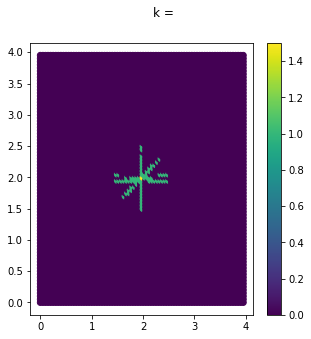

In [270]:
distributions = np.zeros((len(X)))
ray = np.array(coords.flatten().astype(int).tolist())
ray = ray[ray.nonzero()]
distributions[ray] = 1
distributions[i]=1.5
# distributions = distributions.T @ P

fig = plt.figure(figsize=(5,5))
fig.suptitle(f"k = ")
ax1 = plt.subplot(1,1,1)
axs = ax1.scatter(X[:,0],X[:,1],c=distributions)
fig.colorbar(axs)

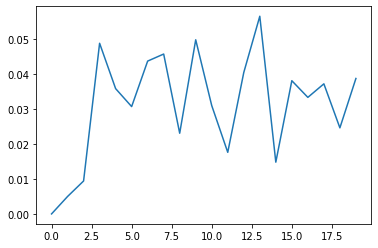

In [264]:
# graph the distances between rays
plt.plot(distances_between_rays[1])

In [322]:
distances_between_rays[2][-1]*20/2

1.5773635084224824

In [323]:
np.sum(distances_between_rays[2])

1.8829380811123158

In [245]:
a = np.random.rand(8)
a

array([0.56614756, 0.1405661 , 0.49114609, 0.6368245 , 0.1056833 ,
       0.89810179, 0.37935784, 0.75307271])

In [248]:
(a <= 0.5).nonzero()

(array([1, 2, 4, 6]),)

In [276]:
a = np.array([[1,2,3,4,5,6,7],[10,11,12,13,14,15,16]])

In [285]:
u = np.isin(a,[4,2,7,15])
u

array([[False,  True, False,  True, False, False,  True],
       [False, False, False, False, False,  True, False]])

In [284]:
arr = np.delete(a, u)
arr

ValueError: boolean array argument obj to delete must be one dimensional and match the axis length of 14

In [282]:
np.delete(a,u.flatten())

array([ 1,  3,  5,  6, 10, 11, 12, 13, 14, 16])

In [167]:
d = drc.diffusion_distances_to(820)

In [168]:
d

array([1.268092  , 1.30931633, 1.29829608, ..., 1.29829608, 1.30931633,
       1.268092  ])

In [218]:
indxs = ((d >= 1.3).astype(int) * (d <= 1.32).astype(int)).nonzero()

In [214]:
indxs

(array([  41,   42,   43,   44,   45,   46,   47,   48,   49,   50,   51,
          52,   53,   54,   55,   56,   57,   58,   59,   60,   61,   62,
          63,   64,   65,   66,   67,   68,   69,   70,   71,   72,   73,
          74,   75,   76,   77,   78,   81,  118,  121,  158,  161,  198,
         201,  238,  241,  278,  281,  318,  321,  358,  361,  398,  401,
         438,  441,  478,  481,  518,  521,  558,  561,  598,  601,  638,
         641,  678,  681,  718,  721,  758,  761,  798,  801,  838,  841,
         878,  881,  918,  921,  958,  961,  998, 1001, 1038, 1041, 1078,
        1081, 1118, 1121, 1158, 1161, 1198, 1201, 1238, 1241, 1278, 1281,
        1318, 1321, 1358, 1361, 1398, 1401, 1438, 1441, 1478, 1481, 1518,
        1521, 1522, 1523, 1524, 1525, 1526, 1527, 1528, 1529, 1530, 1531,
        1532, 1533, 1534, 1535, 1536, 1537, 1538, 1539, 1540, 1541, 1542,
        1543, 1544, 1545, 1546, 1547, 1548, 1549, 1550, 1551, 1552, 1553,
        1554, 1555, 1556, 1557, 1558])

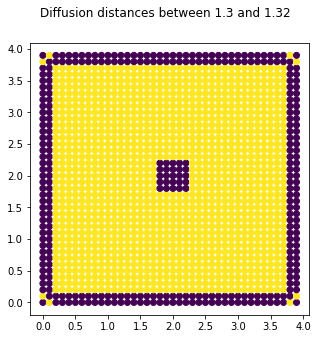

In [220]:
distributions = np.zeros((len(X)))
distributions[indxs] = 1
fig = plt.figure(figsize=(5,5))
fig.suptitle(f"Diffusion distances between 1.3 and 1.32")
ax1 = plt.subplot(1,1,1)
ax1.scatter(X[:,0],X[:,1],c=distributions)

In [223]:
a = np.random.rand(4,4)
np.ones_like(a) @ np.diag(a[1])

array([[0.94500958, 0.78581903, 0.54303723, 0.61533723],
       [0.94500958, 0.78581903, 0.54303723, 0.61533723],
       [0.94500958, 0.78581903, 0.54303723, 0.61533723],
       [0.94500958, 0.78581903, 0.54303723, 0.61533723]])

In [225]:
np.linalg.norm(a - np.ones_like(a) @ np.diag(a[1]),axis=1)

array([0.93951216, 0.        , 0.68734401, 0.44279354])

In [226]:
a

array([[0.0681259 , 0.81893821, 0.87697991, 0.5815216 ],
       [0.94500958, 0.78581903, 0.54303723, 0.61533723],
       [0.79333007, 0.68589703, 0.15400722, 0.07858184],
       [0.91345501, 0.73570014, 0.92607292, 0.82944512]])

In [227]:
(0.068**2 + 0.8189**2+0.8769**2+0.5815**2)**0.5

1.3350344827007279

In [228]:
np.linalg.norm(a,axis=1)

array([1.33512624, 1.47786468, 1.06288319, 1.709165  ])

In [229]:
a * np.array([1,2,3,4])

array([[0.0681259 , 1.63787642, 2.63093974, 2.3260864 ],
       [0.94500958, 1.57163805, 1.6291117 , 2.46134893],
       [0.79333007, 1.37179406, 0.46202166, 0.31432734],
       [0.91345501, 1.47140028, 2.77821877, 3.31778047]])

In [230]:
drc.Ms

array([[0.24680281, 0.22828646, 0.0411985 , ..., 0.        , 0.        ,
        0.        ],
       [0.22828646, 0.21115951, 0.20717425, ..., 0.        , 0.        ,
        0.        ],
       [0.0411985 , 0.20717425, 0.2032646 , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.2032646 , 0.20717425,
        0.0411985 ],
       [0.        , 0.        , 0.        , ..., 0.20717425, 0.21115951,
        0.22828646],
       [0.        , 0.        , 0.        , ..., 0.0411985 , 0.22828646,
        0.24680281]])

In [254]:
from pydiffmap import diffusion_map
mydmap = diffusion_map.DiffusionMap.from_sklearn(epsilon = 0.15, alpha = 0.5, n_evecs=10)
coords = mydmap.fit_transform(X)

In [256]:
diffusion_coordinates = coords

In [257]:
def diffusion_distances_to(i):
        return np.linalg.norm(diffusion_coordinates - (np.ones_like(diffusion_coordinates) @ np.diag(diffusion_coordinates[i])),axis=1)


In [258]:
d = diffusion_distances_to(820)

In [268]:
max(d)

0.23084592509240037

In [271]:
indxs = ((d >= 0.15).astype(int)).nonzero()
indxs

(array([   0,    1,    2, ..., 1597, 1598, 1599]),)

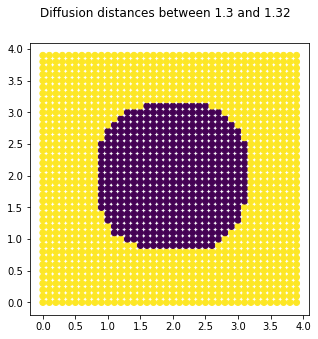

In [272]:
distributions = np.zeros((len(X)))
distributions[indxs] = 1
fig = plt.figure(figsize=(5,5))
fig.suptitle(f"Diffusion distances between 1.3 and 1.32")
ax1 = plt.subplot(1,1,1)
ax1.scatter(X[:,0],X[:,1],c=distributions)

In [218]:
from pecan import data
X = data.sphere(2000)

In [231]:
%%time
drc = DiffusionRayCurvatureV2(X,num_steps=40,knn=5,n_evecs=2)

CPU times: user 183 ms, sys: 35.8 ms, total: 218 ms
Wall time: 91.1 ms


In [232]:
curv, coords, distances = drc.curvature(100)

k is  1094
[-0.00020444  0.00034246 -0.00119986]
norm of y-x 1.0
Sorted point dists [0.00000000e+00 0.00000000e+00 2.99699229e-08 ... 2.91716222e-02
 2.91718835e-02 2.91979052e-02]
k is  1854
[-0.00013689  0.0005643  -0.00159928]
norm of y-x 0.9999999999999999
Sorted point dists [0.00000000e+00 8.47032947e-22 1.65512865e-08 ... 2.93131655e-02
 2.93947706e-02 2.94257221e-02]
k is  1923
[-0.00076083 -0.00066765 -0.00204314]
norm of y-x 1.0
Sorted point dists [0.00000000e+00 0.00000000e+00 5.10700499e-07 ... 2.90915458e-02
 2.90939137e-02 2.91033943e-02]
k is  506
[-0.00093345 -0.00294018  0.00082854]
norm of y-x 1.0
Sorted point dists [0.00000000e+00 0.00000000e+00 3.71506358e-07 ... 2.95917011e-02
 2.95976538e-02 2.96624746e-02]
k is  398
[-0.0021466  -0.00361213 -0.00420257]
norm of y-x 0.9999999999999999
Sorted point dists [0.00000000e+00 2.03287907e-20 1.55372017e-07 ... 2.93813392e-02
 2.93989012e-02 2.94008415e-02]


In [233]:
# Import dependencies
import plotly
import plotly.graph_objs as go
import plotly.express as px
import pandas as pd

# Configure Plotly to be rendered inline in the notebook.
plotly.offline.init_notebook_mode()
def plot_3d(X,distribution,title="",lim=1):
    d = {'x':X[:,0],'y':X[:,1],'z':X[:,2],'colors':distribution}
    df = pd.DataFrame(data=d)
    fig = px.scatter_3d(df, x='x',y='y',z='z',color='colors', title=title)
    fig.show()

In [235]:
distribution = np.zeros(len(X))
distribution[coords[0].flatten().astype(int)] = 1
distribution[100]=2
plot_3d(X,distribution,title="Circle paths")

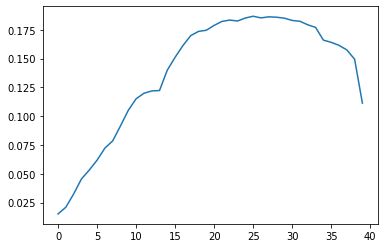

In [17]:
plt.plot(distances[2])

In [205]:
X = data.torus(4000)

In [213]:
from pecan.curvature import DiffusionRayCurvatureV2
drc = DiffusionRayCurvatureV2(X,num_steps=50,knn=10,n_evecs=2)

In [214]:
i = 380
curv, coords, distances_between_rays = drc.curvature(i)

k is  1530
[-0.0004289   0.00185688]
norm of y-x 1.0
Sorted point dists [-8.47032947e-22  0.00000000e+00  3.55122869e-10 ...  2.00292237e-01
  2.00361883e-01  2.00398607e-01]
k is  3199
[-0.00111783  0.00206383]
norm of y-x 1.0
Sorted point dists [0.00000000e+00 0.00000000e+00 1.80584901e-09 ... 2.15608477e-01
 2.15609651e-01 2.15716481e-01]
k is  2201
[ 0.00236928 -0.00081539]
norm of y-x 1.0
Sorted point dists [0.00000000e+00 0.00000000e+00 8.79857125e-10 ... 2.13621117e-01
 2.13864273e-01 2.13893375e-01]
k is  3549
[-0.00187529  0.00174528]
norm of y-x 1.0
Sorted point dists [0.00000000e+00 2.54109884e-21 1.02211474e-09 ... 2.27123900e-01
 2.27161588e-01 2.27305638e-01]
k is  1048
[-0.00088298 -0.0031968 ]
norm of y-x 1.0
Sorted point dists [-3.38813179e-21  0.00000000e+00  1.91584652e-08 ...  1.38663526e-01
  1.38664818e-01  1.38698769e-01]
k is  1408
[-0.00279923 -0.00230023]
norm of y-x 1.0
Sorted point dists [0.00000000e+00 0.00000000e+00 1.66503715e-08 ... 7.61895797e-02
 7.619

In [217]:
distribution = np.zeros(len(X))
distribution[coords[3].flatten().astype(int)] = 1
distribution[i]=2
plot_3d(X,distribution,title="Torus paths")